# Telecom Customer Churn Analysis
## Data Overview and Data Cleaning

This notebook covers the initial exploration and data cleaning steps for a telecom customer churn analysis.
The goal is to understand the dataset structure, identify data quality issues, and prepare clean data for further analysis.

## Imports

We import the required Python libraries for data manipulation and analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

## 1. Dataset Overview

We start by loading the Telco Customer Churn dataset and inspecting its basic structure, including the number of records, features, and data types.

In [2]:
pd.set_option("display.max_columns", None)

path = "../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

## 2. Data Quality Check

Before performing any analysis, we check for potential data quality issues such as incorrect data types or missing values that could affect the results.


In [5]:
df["TotalCharges"].head(10)

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: str

In [6]:
df[df["TotalCharges"].str.strip() == ""].shape

(11, 21)

In [7]:
df[df["TotalCharges"].str.strip() == ""].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


### Handling missing values in TotalCharges

The `TotalCharges` column should represent the total amount paid by a customer.
However, some records contain missing values stored as empty strings.

These cases correspond to customers with zero tenure, meaning they are new customers who have not yet made any payments.
To reflect this business logic, missing values in `TotalCharges` were replaced with 0.


In [8]:
df["TotalCharges"] = df["TotalCharges"].str.strip()
df["TotalCharges"] = df["TotalCharges"].replace("", "0")

In [9]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

## 3. Clean Dataset Summary

After handling data quality issues, we verify that all columns have appropriate data types and the dataset is ready for exploratory analysis.


In [10]:
df.info()
df[df["tenure"] == 0][["tenure", "MonthlyCharges", "TotalCharges"]].head()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,0.0
753,0,20.25,0.0
936,0,80.85,0.0
1082,0,25.75,0.0
1340,0,56.05,0.0


## 4. Customer Churn Overview

Customer churn represents the percentage of customers who have stopped using the service.
Understanding the overall churn rate provides a baseline for further segmentation and root cause analysis.


In [11]:
# Overall churn rate
churn_counts = df["Churn"].value_counts()
churn_rate = churn_counts["Yes"] / len(df)

churn_counts, churn_rate

(Churn
 No     5174
 Yes    1869
 Name: count, dtype: int64,
 np.float64(0.2653698707936959))

The churn rate represents the proportion of customers who have left the company.
This metric serves as a baseline and reference point for comparing churn across different customer segments.

### Churn as a Key Performance Indicator (KPI)

The overall churn rate is treated as a key performance indicator (KPI).
It provides a high-level view of customer retention and helps identify whether churn levels are acceptable or require immediate action.


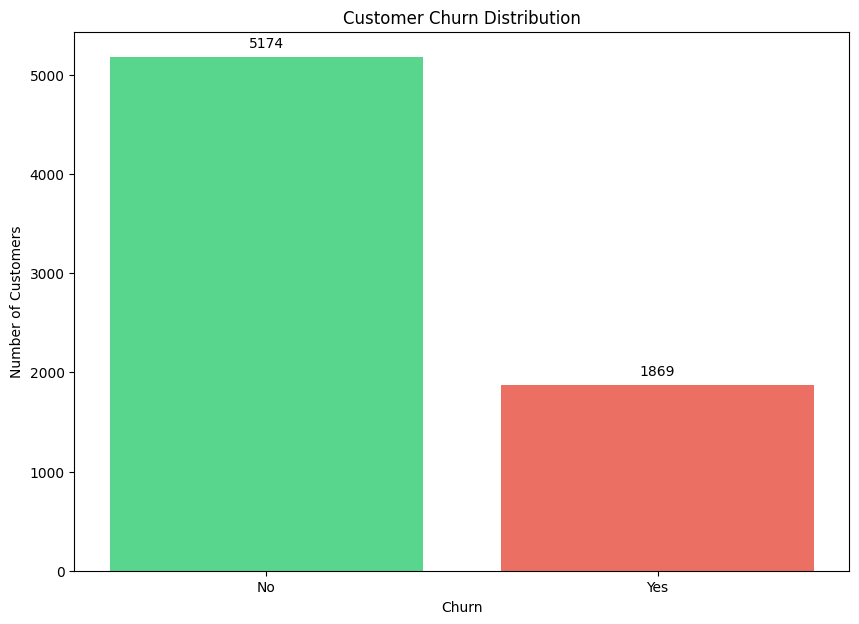

In [12]:
plt.figure(figsize = (10, 7))
colors = ["#2ecc71", "#e74c3c"]
bars = plt.bar(churn_counts.index,
               churn_counts.values,
               color = colors,
               alpha = 0.8)
plt.bar_label(bars,
              labels=churn_counts.values,
              padding=5)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

While the overall churn rate summarizes the general retention situation, it does not explain why customers leave.
To gain actionable insights, the next step is to analyze churn across different customer segments.

## 5. Churn Segmentation — Contract

Contract type is one of the most common churn drivers in subscription businesses.
In this section, we quantify churn rate by contract type to identify the highest-risk segment(s).

We report:
- **Customers** (count)
- **Churned** (count of `Churn = Yes`)
- **Churn rate** (share of churned customers within each contract type)

In [13]:
contract_summary = (
    df.assign(churn_flag=(df["Churn"] == "Yes").astype(int))
      .groupby("Contract", as_index=True)
      .agg(
          customers=("churn_flag", "size"),
          churned=("churn_flag", "sum")
      )
      .assign(churn_rate=lambda x: x["churned"] / x["customers"])
      .sort_values("churn_rate", ascending=False)
)

contract_summary

,customers,churned,churn_rate
Contract,,,
Month-to-month,3875,1655,0.427097
One year,1473,166,0.112695
Two year,1695,48,0.028319


Contract type shows a strong and clear relationship with customer churn.

Customers on **month-to-month contracts** have a churn rate of **42.7%**, which is almost 4× higher than one-year contracts (**11.3%**) and more than 15× higher than two-year contracts (**2.8%**).

This indicates that short-term contractual commitment is a major risk factor for customer churn.


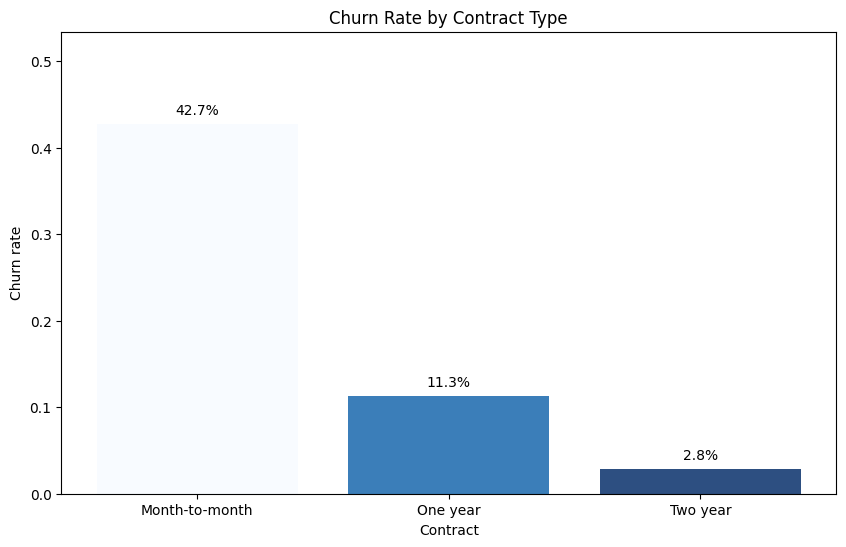

In [14]:
plt.figure(figsize=(10, 6))
values = contract_summary["churn_rate"]

norm = mcolors.Normalize(vmin=values.min(), vmax=values.max())
cmap = cm.Blues_r

colors = cmap(norm(values))
bars = plt.bar(contract_summary.index, values, color= colors, alpha=0.85)

plt.bar_label(
    bars,
    labels=[f"{v:.1%}" for v in values],
    padding=5
)

plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract")
plt.ylabel("Churn rate")

y_max = values.max()
plt.ylim(0, min(1.0, y_max * 1.25 if y_max > 0 else 0.1))

plt.show()

### Business takeaway

- Month-to-month customers represent the **highest churn risk segment** and should be the primary focus of retention efforts.
- Incentives that encourage customers to switch from month-to-month to longer-term contracts may significantly reduce churn.
- Early lifecycle interventions (e.g., onboarding, first-billing experience) are especially important for customers without long-term commitment.

## 6. Churn Segmentation — Internet Service

Internet service type is another potential driver of customer churn.
In this section, we analyze churn rate across different internet service categories.

In [15]:
internet_summary = (
    df.assign(churn_flag=(df["Churn"] == "Yes").astype(int))
      .groupby("InternetService", as_index=True)
      .agg(
          customers=("churn_flag", "size"),
          churned=("churn_flag", "sum")
      )
      .assign(churn_rate=lambda x: x["churned"] / x["customers"])
      .sort_values("churn_rate", ascending=False)
)

internet_summary

,customers,churned,churn_rate
InternetService,,,
Fiber optic,3096,1297,0.418928
DSL,2421,459,0.189591
No,1526,113,0.074050


Churn rates differ significantly across internet service types.

Customers using **Fiber optic** internet have the highest churn rate at **41.9%**, which is more than double the churn rate of **DSL customers (19.0%)** and nearly six times higher than customers with **no internet service (7.4%)**.

This suggests that customers with more advanced or premium internet services are at a substantially higher risk of churn.

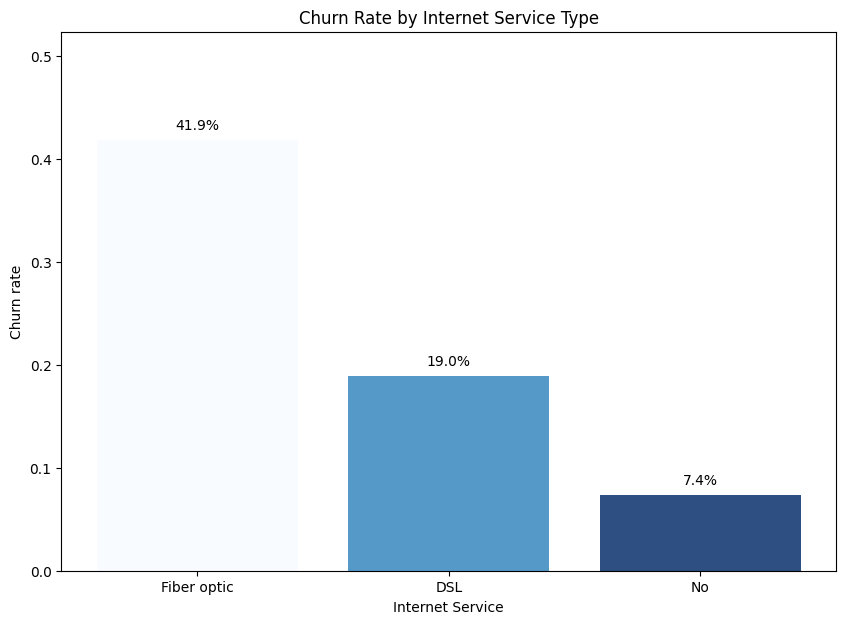

In [16]:
plt.figure(figsize=(10, 7))
values = internet_summary["churn_rate"]

norm = mcolors.Normalize(vmin=values.min(), vmax=values.max())
cmap = cm.Blues_r

colors = cmap(norm(values))

bars = plt.bar(
    internet_summary.index,
    values,
    color = colors,
    alpha=0.85
)

plt.bar_label(
    bars,
    labels=[f"{v:.1%}" for v in values],
    padding=5
)

plt.title("Churn Rate by Internet Service Type")
plt.xlabel("Internet Service")
plt.ylabel("Churn rate")

y_max = values.max()
plt.ylim(0, min(1.0, y_max * 1.25 if y_max > 0 else 0.1))

plt.show()

### Business takeaway

- Fiber optic customers represent a **high-risk churn segment** and should be prioritized for retention initiatives.
- High churn among fiber users may indicate issues related to pricing, service quality, or unmet expectations from a premium product.
- Further analysis should explore factors such as monthly charges, contract type, and service add-ons within the fiber segment to identify actionable churn drivers.

## 7. Churn Segmentation — Payment Method

Payment method reflects customer payment behavior and level of commitment.
In this section, we analyze churn rate across different payment methods.

In [17]:
payment_summary = (
    df.assign(churn_flag=(df["Churn"] == "Yes").astype(int))
      .groupby("PaymentMethod", as_index=True)
      .agg(
          customers=("churn_flag", "size"),
          churned=("churn_flag", "sum")
      )
      .assign(churn_rate=lambda x: x["churned"] / x["customers"])
      .sort_values("churn_rate", ascending=False)
)

payment_summary

,customers,churned,churn_rate
PaymentMethod,,,
Electronic check,2365,1071,0.452854
Mailed check,1612,308,0.191067
Bank transfer (automatic),1544,258,0.167098
Credit card (automatic),1522,232,0.152431


Churn rates vary substantially across different payment methods.

Customers using **electronic check** exhibit the highest churn rate at **45.3%**, which is more than double the churn rate observed for other payment methods.
In contrast, customers using **automatic payment methods** (bank transfer or credit card) show the lowest churn rates, ranging from **15% to 17%**.

This pattern highlights a strong association between payment behavior and customer retention.

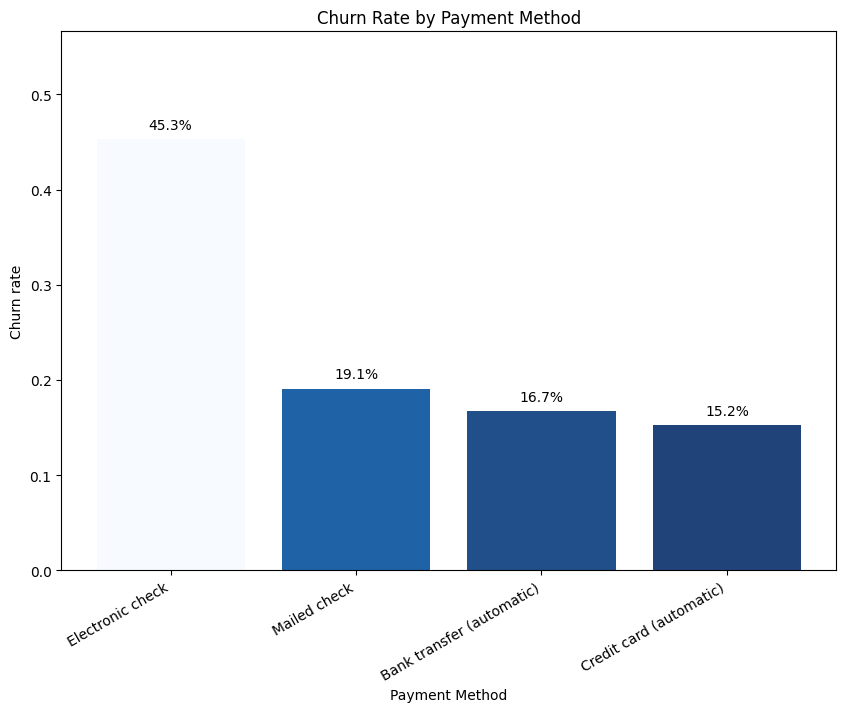

In [18]:
plt.figure(figsize=(10, 7))
values = payment_summary["churn_rate"]

norm = mcolors.Normalize(vmin=values.min(), vmax=values.max())
cmap = cm.Blues_r

colors = cmap(norm(values))

bars = plt.bar(
    payment_summary.index,
    values,
    color=colors,
    alpha=0.9
)

plt.bar_label(
    bars,
    labels=[f"{v:.1%}" for v in values],
    padding=5
)

plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn rate")

y_max = values.max()
plt.ylim(0, min(1.0, y_max * 1.25))

plt.xticks(rotation=30, ha="right")
plt.show()


### Business takeaway

- Customers paying via **electronic check** represent a high-risk churn segment and should be prioritized for deeper analysis.
- The lower churn rates among **automatic payment users** suggest that higher payment convenience and commitment may be linked to better retention.
- Further analysis should explore whether encouraging a switch from manual to automatic payment methods could help reduce churn, especially among high-risk segments.

## 8. Churn Segmentation — Tenure Bands

Customer tenure often correlates with churn risk.
In this section, we bucket customers into tenure bands and compare churn rates across these groups.

In [19]:
bins = [-1, 12, 24, 48, 72]
labels = ["0–12", "13–24", "25–48", "49–72"]

df_tenure = df.copy()
df_tenure["tenure_band"] = pd.cut(df_tenure["tenure"], bins=bins, labels=labels)

tenure_summary = (
    df_tenure.assign(churn_flag=(df_tenure["Churn"] == "Yes").astype(int))
             .groupby("tenure_band", as_index=True)
             .agg(
                 customers=("churn_flag", "size"),
                 churned=("churn_flag", "sum")
             )
             .assign(churn_rate=lambda x: x["churned"] / x["customers"])
)

tenure_summary

,customers,churned,churn_rate
tenure_band,,,
0–12,2186,1037,0.474382
13–24,1024,294,0.287109
25–48,1594,325,0.203890
49–72,2239,213,0.095132


Customer churn decreases consistently as tenure increases.

Customers in their first year (**0–12 months**) show the highest churn rate at **47.4%**.
Churn drops significantly for customers with longer tenure, reaching **9.5%** among customers who have stayed with the company for more than four years (**49–72 months**).

This pattern highlights a strong lifecycle effect, where early-stage customers are substantially more likely to churn than long-tenured customers.

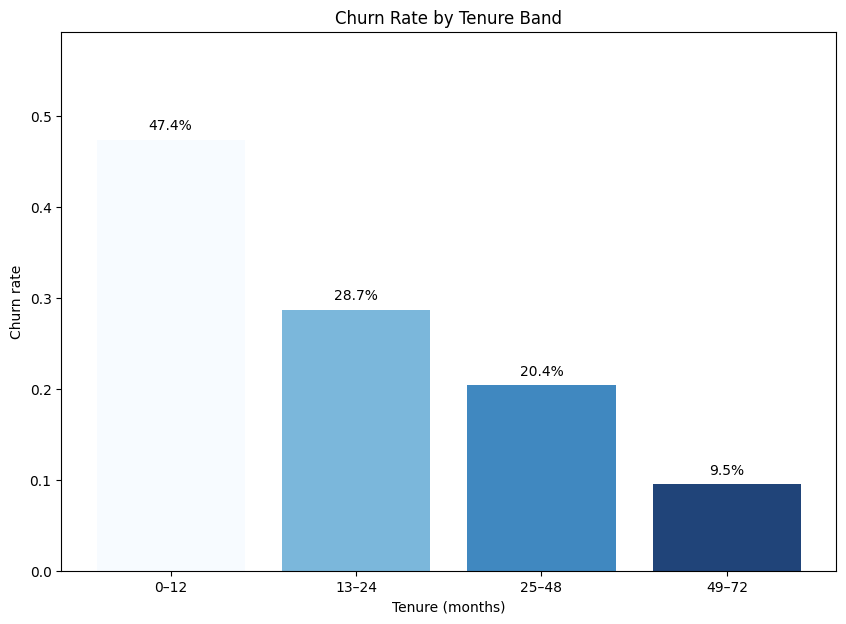

In [20]:
plt.figure(figsize=(10, 7))
values = tenure_summary["churn_rate"]

norm = mcolors.Normalize(vmin=values.min(), vmax=values.max())

cmap = cm.Blues_r
colors = cmap(norm(values))
bars = plt.bar(
    tenure_summary.index.astype(str),
    values,
    color=colors,
    alpha=0.9
)

plt.bar_label(
    bars,
    labels=[f"{v:.1%}" for v in values],
    padding=5
)

plt.title("Churn Rate by Tenure Band")
plt.xlabel("Tenure (months)")
plt.ylabel("Churn rate")

y_max = values.max()
plt.ylim(0, min(1.0, y_max * 1.25 if y_max > 0 else 0.1))

plt.show()

### Business takeaway

- Customer churn risk is highest during the **early lifecycle stage**, particularly within the first 12 months.
- Retention efforts should prioritize **new and recently acquired customers**, focusing on onboarding, first-billing experience, and early value realization.
- Tenure should be treated as a **key contextual variable** in further churn driver analysis rather than a standalone root cause.

## 9. Segmentation Summary — Key Churn Insights

The segmentation analysis reveals several consistent patterns that help identify high-risk churn segments and provide direction for deeper investigation.

- **Contract type is the strongest churn differentiator.**
  Customers on month-to-month contracts exhibit significantly higher churn compared to those on one- or two-year contracts, highlighting the role of long-term commitment in retention.

- **Internet service type shows a clear product-level risk pattern.**
  Fiber optic customers have substantially higher churn rates than DSL users and customers without internet service, indicating potential issues related to pricing, service expectations, or perceived value.

- **Payment behavior is strongly associated with churn.**
  Customers using electronic checks show markedly higher churn than those using automatic payment methods, suggesting that payment convenience and behavioral commitment may influence retention.

- **Customer lifecycle plays a critical contextual role.**
  Churn risk is highest during the first year of tenure and decreases steadily as customers remain longer with the company, emphasizing the importance of early-stage retention.

Overall, churn is concentrated among **new customers with low commitment, premium services, and manual payment methods**.
These findings provide a clear foundation for deeper churn driver analysis and targeted retention strategies.